# Pymaceuticals Inc.
---
### **<ins>*Analysis:</ins>***
#### **3 observations or inferences that can be made from the data**:
  1. *Ceftamin* has the largest interquartile range.
     - This shows that the central tendency of final tumor volume for the drug Ceftamin is spread further that the 3 other drugs it is being compared to. 
       - This suggests that the central data is farther apart and potentially less consistent.
       - 

  2. *Capomulin* helped mouse l509 reduce the volume of its tumor over the duration of the study (Timepoints)
     - This shows that overall, the tumors on mice treated with Capomulin goes down over time. 
       - Although the tumor sizes decreased over time, this graph suggests that there is some variability due to the fluctuations in tumor size over time.
       - 
  
  3. The *correlation* between mouse weight vs. average tumor volume is **strongly positive**
     - The correlation coefficient is 0.84, which indicates a positive correlation. 
       - Any correlation coefficient above 0.7 is considered strong.
       - This suggests that the higher the weight of the mouse, the higher tumor volume. 
        - This is most likely because the higher the tumor volume, the heavier the mouse would be. 
        - 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data\Mouse_metadata.csv"
study_results_path = "data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count_mice = merged_df["Mouse ID"].unique().size
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df["Mouse ID"].unique().size
clean_mouse_count

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_vol_med = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_vol_var = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_vol_std = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_vol_sem = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_by_regimen_df = pd.DataFrame(
    {
        "Mean Tumor Volume": tumor_vol_mean,
        "Median Tumor Volume": tumor_vol_med,
        "Tumor Volume Variance": tumor_vol_var,
        "Tumor Volume Std. Dev.": tumor_vol_std,
        "Tumor Volume Std. Err.": tumor_vol_sem,
    }
)

tumor_vol_by_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_regim_vols = clean_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_regim_vols

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Timepoints'>

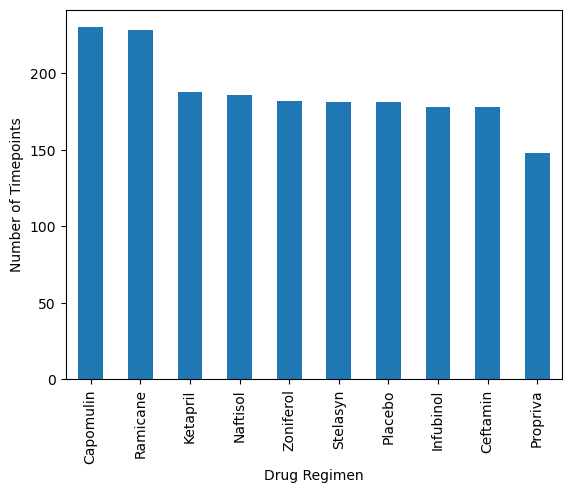

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_timepoint = clean_df["Drug Regimen"].value_counts()
rows_timepoint.plot.bar(x=[0], ylabel='Number of Timepoints')

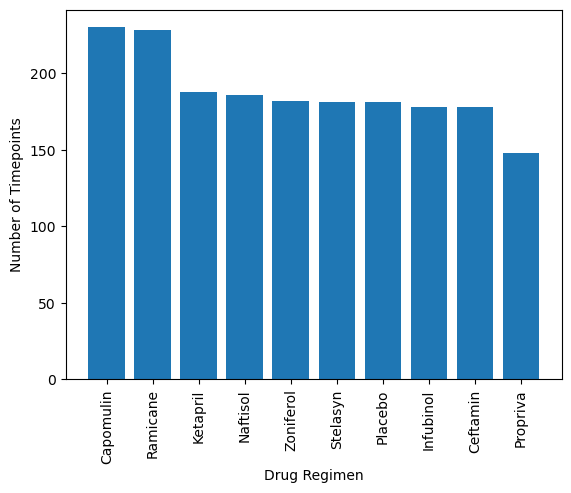

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_timepoint.index, rows_timepoint.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='sex'>

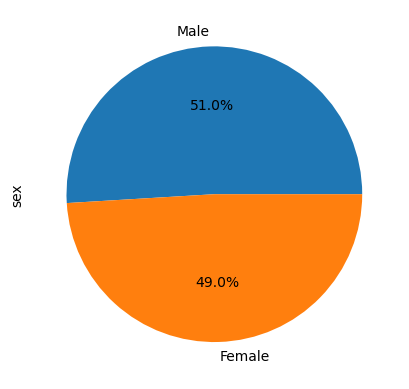

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df["Sex"].value_counts()
gender_dist

gender_dist.plot.pie(ylabel='sex', autopct='%1.1f%%')

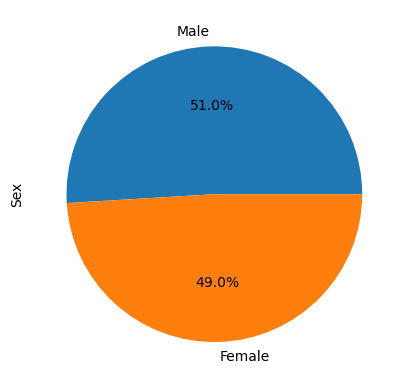

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist, labels=['Male','Female'], autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
last_tp_df = last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_df = last_tp_df.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = []
for drug in drug_regimens:
    drug_regimen_list.append(drug)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows in the merged DataFrame that correspond to each drug
for drugs in drug_regimen_list:    
    drug_data = last_tp_df.loc[last_tp_df["Drug Regimen"] == drugs, 'Tumor Volume (mm3)']
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_vol.append(drug_data)      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drugs}'s potential outliers: {outliers}") 
    

 
    
   


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


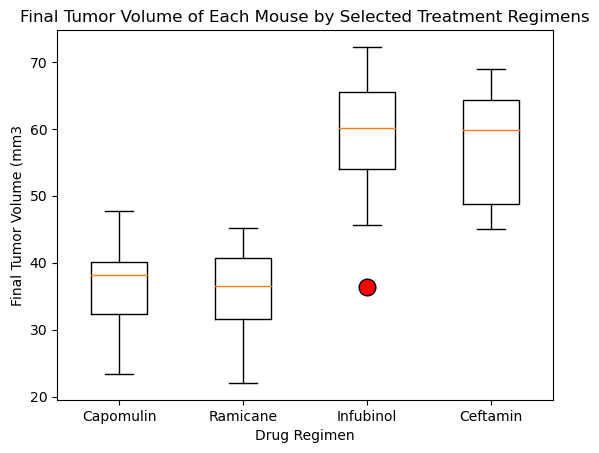

In [15]:
# Generate box plot
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 12)

plt.boxplot(tumor_vol, flierprops=flierprops)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3')
plt.title('Final Tumor Volume of Each Mouse by Selected Treatment Regimens')
plt.xticks([1,2,3,4], drug_regimen_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

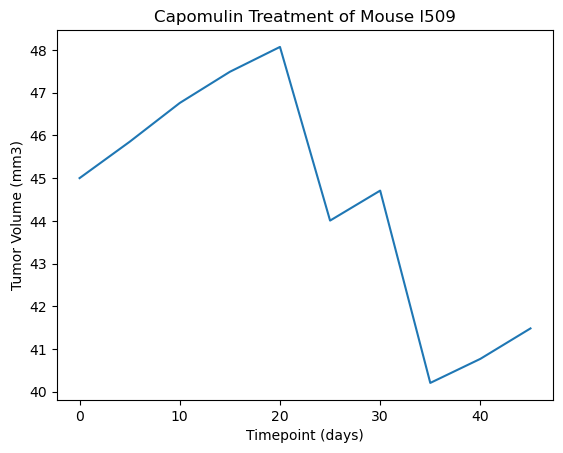

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
x_timepoint = l509_df['Timepoint']
y_tum_size = l509_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse l509")
plt.plot(x_timepoint, y_tum_size)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

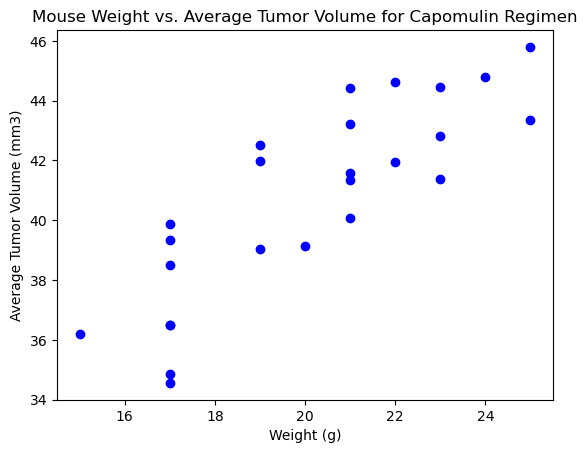

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()
x_weight = capomulin_df["Weight (g)"].groupby(capomulin_df['Mouse ID']).mean()
y_avg_tum_vol = capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df['Mouse ID']).mean()

plt.scatter(x_weight, y_avg_tum_vol, marker='o', color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()






## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


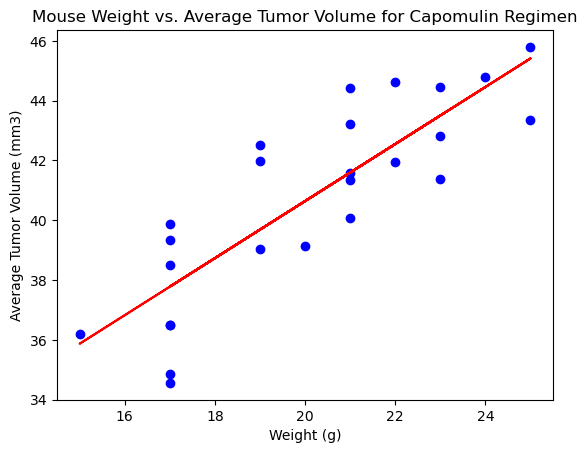

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coef = st.pearsonr(x_weight, y_avg_tum_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coef[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_avg_tum_vol)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight, y_avg_tum_vol, marker='o', color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_weight, regress_values, 'r')
plt.show()